# *Console Gaming: Forecasting  an Industry's Survival*
### _by Anmol Srivastava, Iniyan Chezhian, & Pamela Caroline_

### *A Dying Breed?*
In broad terms, console gaming has a cultural place that is hard to replace; for gamers and non-gamers alike, the very mention of a video game brings to mind images of an Xbox controller, a GameBoy, or a Wii remote. Certainly, many of the same people are aware of mobile games, PC games, and games played in wildly different virtual-reality environments. However, the iconography of certain consoles, or of certain console games and franchises, is undeniable. Then why does there exist an inescapable amount of chatter regarding the demise of the console gaming industry? 

Indeed, there is much speculation that consoles are headed towards an inevitable replacement by both the aforementioned 'modern' gaming platforms and other, unexplored systems. Below, we've provided two reports on the matter. The first (from a technology-oriented site) highlights a recent inability of console launches to boost struggling game sales. Citing that older consoles are seeing declines in overall purchases, it argues that console-exclusive games can be user-hostile, requiring expensive set-ups and constant updates to remain functional. Conversely, the second source (a financial report) argues that based on console games' current market domination, the console industry may see its biggest boost ever within the next five years. 
    - https://www.cnet.com/news/video-game-industry-struggles-to-grow-a-year-after-new-console-launches/
    - https://www.grandviewresearch.com/industry-analysis/gaming-console-market 
   
### *Why should you care - and what can you learn - about this issue?*

Clearly, this is a multi-faceted issue in need of clear-cut further analysis. And not just video-gamers are affected by this topic! Many life-changing innovations are dervied from gaming equipment and theory. For instance, the Xbox Kinect can be used to develop concussion analysis and treatment options. But at the same time, modern VR technology is becoming increasingly used in military __and__ medical training, a trend that traditional consoles have little place in. The respective summaries for these advances are below.   
    - https://www.nbcwashington.com/news/health/Md-Teen-Develops-New-Concussion-Tool-After-Serious-Injury-351209771.html
    - https://medcitynews.com/2017/10/medical-education-through-competitive-virtual-reality-video-games/
    - https://science.howstuffworks.com/gamer-soldier2.htm

Undoubtedly, this debate will have tangible impacts. Many markets depend on video games' innovative hardware and software: tools that further our ability to visualize, compute, and store information. You, on the other hand, may simply be an avid gamer that is concerned about new consoles' desperate prioritization of online play over local play. Or perhaps you're considering getting into niche PC games, or are curious about the viability of popular smartphone games. 

In any case, we should analyze the ebbs and flows of the console industry. In doing so, we'll meaningfully identify differences in various game-types' successes, assess the factors that contribute to those successes, and build a gauge of where the market for this form of entertainment is headed. 

### *What you'll be investigating...*
    - Are the sales-rates for games of different platforms changing significantly with time?
    - If so, are standard console games' sales faltering in that changing environment?
    - Which factors contribute to sales, and can they be modelled to predict sales?
    
For all this, we'll be using the Python programming language, some data, and data-science concepts. It's ok if you don't have experience with these! You'll be going on a step-by-step walkthrough of a typical data-oriented analysis project. Here, your data will be about the financial successes of the video game industry, and your analysis will evaluate console performance in regards to other forms of gaming. Then, you will:
    - collect relevant data on industry performance
    - process the data and prepare it for statistical analysis
    - perform introductory exploration of the data to determine hypotheses of interest
    - test theories, use machine learning to model aspects of the data, and test your models
    - yield useful insight from your results, and address the flaws of your experimentation

## Step 1: Data Collection
First note that our data is hosted at the following site, and can be accessed directly via the 'Download' option. The data, in broad terms, covers critical and commercial data regarding various games, from various developers, and on various platforms. It does so for games from (at the earliest) 1982 up until December of 2016. Further details are explained below. 
    - https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data
   
Now, this step is actually pretty straightforward! We import *pandas* and *numpy*, libraries that will help us store, organize, and process our data. We navigate to the download option of the above site, and find the exact URL address of the dataset on the Kaggle server. We use that address, and a pandas library function, to read that dataset into a desirable format, and then output a portion of it to see what we have.

In [2]:
# import the libraries that will help us manage and analyze data
import pandas as pd
import numpy as np

# retain as a string variable the source of the csv file
page = 'https://github.com/otacke/udacity-machine-learning-engineer/raw/master' 

# retain as a string variable the exact url extension of the csv file
csv = '/submissions/capstone_project/data/Video_Games_Sales_as_at_22_Dec_2016.csv'

# combine the string variables, load the csv file into a pandas dataframe
df = pd.read_csv(page + csv)

# output a sample of the data for context and correctness
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


##### A brief summary:
So, what does our initial data look like? Each row represents a unique game, distinguished by name. A game has a platform, release year, publisher, and developer as attributes or columns. Other attributes further describe a game, such as Genre and Rating. Also, there are critics' and users' scores, indicating (on average) how games were received by each. The count attributes for these columns represent the number of people that contributed to that average. 

Finally, we have a plethora of sales information. Refer to the source page for full details. In summary, sales are in millions of units. NA_sales refers to North American Sales, EU to the European Union, JP to Japanese, Global to worldwide sales, and Other to possible sales in Asia, Africa, or South America. 

This is a lot of complicated data - in the next step, we'll filter some of the irrelevant parts out!

## Step 2: Data Processing
__Note__! Python is an easy language to intuit, but if you're curious about the inner workings of the many commands we use to operate upon our dataset, explore these documentations for the *pandas* and *numpy* libraries, which outline the functions we will use to transform our dataset. 
    - https://pandas.pydata.org/pandas-docs/stable/dsintro.html
    - https://docs.scipy.org/doc/numpy/reference/

Our data is messy and extraneous. So we'll first remove columns that don't relate to our analysis. We're concerned with American and global sales, so let's remove the others. Scores from critics and users may matter, but their counts  won't - those will go, too. Finally, we keep the platform (consoles vs. non-consoles) column, but disregard publishers, developers and maturity ratings.

Next, we'll sort the data by year and then by name, in ascending order. After that, we'll assess the unique types of gaming platforms that the set provides (printed below). We need to rename some values clearly. Essentially, we label the portable (Nintendo, Gameboy, and PlayStation) consoles, and the non-portable PlayStation and Xbox consoles. PC and Dreamcast are, for now, left as is. 

__Note__! PC and Dreamcast are the only atypical gaming types in this set. And Dreamcast is an old system! It can transform into a handheld OR standard console, much like the new Nintendo Switch. Hence, we'll remove entries with Dreamcast games. So PC is our only gauge of non-console gaming. However, since the conversation regarding the demise of consoles is centered around rising PC usage, this is an acceptable feature for our project. 

Given these categories, we'll create a new column, which refers to the *general* type of a platform. PC refers to non-console gaming, while portable and non-portable consoles are the other types. This makes for 3 possible values for each row of this new column, based on the modified platform attribute. 

__Note__! All sales were standardized (made into comparable format) via a formula derived by the data provider. But we'll have to standardize scores, as they are on different scales. Divide each score column by the column's max. value, making each value  relative to its column's maximum. Then, each critic or user score is a value between 0 and 1 (relative to the max. possible critic or user score). The meaning is unchanged - higher scores are still better. 

In [3]:
# work on a copy of our data set
processing_df = df.copy()

# identify the columns we find irrelevant
remove = ['EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Count', 
          'User_Count', 'Developer', 'Publisher', 'Rating'
         ]

# remove those columns from the data set we are working on
processing_df.drop(remove, axis = 1, inplace = True)

# now, remove any rows which have an unusable/NaN value for any column
processing_df = processing_df.dropna()

# sort the rows by year of release first, then name, in ascending order
processing_df = processing_df.sort_values(['Year_of_Release', 'Name'])

# find all distinct values for the platforms of all of the games
distinct = processing_df.Platform.unique()

# let's see all the different types of platforms 
print('\n\nInitial Distinct Platform Values:\n\n', distinct, end = '\n\n')

# DC refers to Dreamcast, replace all occurrences of DC with more descriptive name
processing_df['Platform'].replace('DC', 'Dreamcast', inplace = True)

# however, Dreamcast is obsolete - so the set is changed to exclude those rows
processing_df = processing_df[processing_df.Platform != 'Dreamcast']

# replace all PS (1-4) with a standard PlayStation-console label
processing_df['Platform'].replace(['PS','PS2','PS3','PS4'], 'PlayStation', inplace = True)

# PSP and PSV refer to portable PSN, replace all with PlayStation Handheld label
processing_df['Platform'].replace(['PSP','PSV'], 'Handheld PlayStation', inplace = True)

# GBA and GC refer to GameBoys, replace with GameBoy label
processing_df['Platform'].replace(['GBA','GC'], 'GameBoy', inplace = True)

# DS and 3DS refer to Nintendo DS, replace with relevant label
processing_df['Platform'].replace(['DS','3DS'], 'Nintendo DS', inplace = True)

# all X-consoles refer to Xbox, replace with relevant label 
processing_df['Platform'].replace(['XB','X360','XOne'], 'Xbox', inplace = True)

# all Wii-console refer to Wii, replace with relevant label
processing_df['Platform'].replace(['Wii','WiiU'], 'Wii',inplace=True)

# a list of 7 boolean conditions 
conditions = [
    
    # first 3: a row's Platform value is any of the handheld-console system
    (processing_df['Platform'] == 'PlayStation Handheld'),
    (processing_df['Platform'] == 'Game Boy'),
    (processing_df['Platform'] == 'Nintendo DS'),
    
    # next 3: a row's Platform value is any of the standard-console system
    (processing_df['Platform'] == 'PlayStation'),
    (processing_df['Platform'] == 'Xbox'),
    (processing_df['Platform'] == 'Wii'),

    # last 1: a row's Platform value is any of the non-console system
    (processing_df['Platform'] == 'PC')
]

# each of those 7 conditions correspond to one of 7 console choices
choices = [
    
    # first 3: a handheld console
    'Handheld Console', 
    'Handheld Console',
    'Handheld Console',
    
    # next 3: a traditional console
    'Standard Console',
    'Standard Console',
    'Standard Console',

    # last 1: not a console
    'Non-Console'
]

# new column: console type, from the 7 choices, based on the condition they fall into
processing_df['Platform_Type'] = np.select(conditions, choices, default = 'N/A')

# in user scores, missing scores are words, so keep rows that don't contain letters
processing_df = processing_df[~processing_df['User_Score'].str.contains('[a-zA-Z]')]

# ensure that the user score column values are decimal numbers
processing_df['User_Score'] = pd.to_numeric(processing_df['User_Score'])

# ensure that the critic score column values are decimal numbers
processing_df['Critic_Score'] = pd.to_numeric(processing_df['Critic_Score'])

# find the max user score
max_u = processing_df['User_Score'].max()

# find the max critic score
max_c = processing_df['Critic_Score'].max()

# new column: standardized user score, divide each user score by max user score
processing_df['User_Score'] = processing_df['User_Score'] / max_u

# new column: standardized critic score, divide each user score by max critic score
processing_df['Critic_Score'] = processing_df['Critic_Score'] / max_c

# output sample of processed dataset - we are ready to do real analysis!
processing_df.head()



Initial Distinct Platform Values:

 ['PC' 'PS' 'DC' 'PS2' 'XB' 'GBA' 'GC' 'PSP' 'DS' 'X360' 'PS3' 'Wii' '3DS'
 'PSV' 'WiiU' 'PS4' 'XOne']



,Name,Platform,Year_of_Release,Genre,NA_Sales,Global_Sales,Critic_Score,User_Score,Platform_Type
14472,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.602041,0.604167,Non-Console
14623,SimCity,PC,1988.0,Simulation,0.00,0.03,0.653061,0.229167,Non-Console
14612,Doom,PC,1992.0,Shooter,0.02,0.03,0.867347,0.854167,Non-Console
1567,Battle Arena Toshinden,PlayStation,1994.0,Fighting,0.39,1.27,0.704082,0.656250,Standard Console
1160,Diablo,PC,1996.0,Role-Playing,0.01,1.59,0.959184,0.906250,Non-Console


## Step 3: Exploratory Data Analysis & Visualization
We still don't have a guage of what our data really 'looks like'. So, we need to see if our experimental questions have any value; for instance, is it worth it to explore changes in sales over time - or to comapre the influence of scores and genres on financial success? Let's take a look!

Essentially, we're going to compute and visualize some broad statistical comparisons between our attributes, and use the results to orient our later tests and models. More specifically, we'll first perform some simple statistical procedures, which will help us discover certain patterns and trends in the data. We'll leave the rigorous analysis, modelling, and testing for the next step. 

Before we begin, we'll need to use the *matplotlib* library for visualizations, whose documentation is provided below. Peruse through it - but keep in mind, the various commands for plotting aren't the most important parts of the below code. 
    - https://matplotlib.org/contents.html 

In [5]:
# import plotting library
from matplotlib import pyplot as pp

# set up plotting environment
% matplotlib inline

It is now necessary to look into simple linear regression: a concept that will be used and expanded upon many times in the remainder of this project. In general terms, linear regression is a mathematical procedure that takes in data like ours (in a more organized format), and is told to predict one of the data's features, based on some other features. The link below, from Penn. State, is an academic source that can explain this concept far more effectively:
    - https://onlinecourses.science.psu.edu/stat501/node/250
    
As you may be thinking, some of our data isn't numeric! Fortunately, linear regression works in these cases, too. For the theory behind such 'categorical' features (in particular, predictors that take one of a finite amount of qualitative values), visit the follow-up resource to the above PSU link. It's followed by a portion of the *numpy* documentation that outlines how we'll achieve simple linear regression in our code below:
    - https://onlinecourses.science.psu.edu/stat501/node/301
    - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html

Our methods below are informal; right now, we're interested in the bigger picture, not in peak accuracy. Before we begin, we saved you some work - we went through the global sales values, and found an extreme maximum outlier that skewed all plots. We exclude this data point for now, but will use it in Step 4. 
    
Also, let's keep our attention on global sales (which, by definition, incorporates North American sales). Our first scatter plot will group all the sales-values by their Console_Type value, and color them clearly on the plot. It will then plot all sales over time, but perform simple linear regression for each of the three Console_Type categories. The result will be three lines of best fit, which reveal the general change in sales for each platform type, over time. 

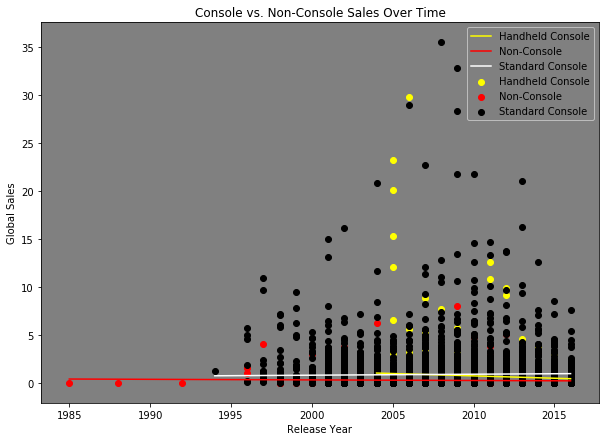

In [6]:
# set plot sizes and colors
pp.rcParams['figure.figsize'] = (10, 7)
pp.rcParams['axes.facecolor'] = 'grey'

# work with a copy of the dataset processed in Step 2
cdf = processing_df.copy()

# for global sales, the max. sale is an extreme outlier
gl_outlier = cdf['Global_Sales'].max()

# optional: this is an informal plot, so let's exclude the outlier
cdf = cdf[cdf['Global_Sales'] != gl_outlier]

# also exclude rows with unavailable (n/a) console types
cdf = cdf[cdf['Platform_Type'] != 'N/A']

# create an empty plot
fig, ax = pp.subplots()

# dataframe based on current one, with year, global sales, console type
temp_df1 = cdf[['Year_of_Release', 'Global_Sales', 'Platform_Type']]

# we'll need an index as we go through the three groups of console types
i = 0

# two arrays of colors - used for differentiating plotted console types 
c1 = ['yellow', 'red', 'white']
c2 = ['yellow', 'red', 'black']

# group both by Console Type (by the three possible console values)
for name, group in temp_df1.groupby(['Platform_Type']):
    
    # simple linear regression with year as predictor x, sales as response y
    line_fit = np.polyfit(group['Year_of_Release'], group['Global_Sales'], deg = 1)
    
    # build the model equation from the results of the regression above
    eq = line_fit[0] * group['Year_of_Release'] + line_fit[1]
    
    # plot the line of best fit resulting from that model equation
    ax.plot(group['Year_of_Release'], eq, color = c1[i], label = name) 
    
    # plot the actual data points, too, and label and color them properly
    ax.scatter(group['Year_of_Release'], 
               group['Global_Sales'], 
               label = name, 
               color = c2[i])
    
    # label axes and title the plot
    ax.set(xlabel = 'Release Year', 
           ylabel = 'Global Sales', 
           title = 'Console vs. Non-Console Sales Over Time')
    
    # show a legend to distinguish the data
    ax.legend()
    
    # increment the index to change the colors used in our plots
    i += 1

##### A brief summary:
Stuff.

In [ ]:
##### Plotting Sales by Genre ##### 


##### A brief summary:
Stuff.

Our last task will be another scatter plot - this time, correlating the effects of scores from users and critics, on global sales. We'll use the same grouping method as before, and the same linear regression procedure. Our result will be two lines of best fit, for the relations between sales and each of the two score types. 

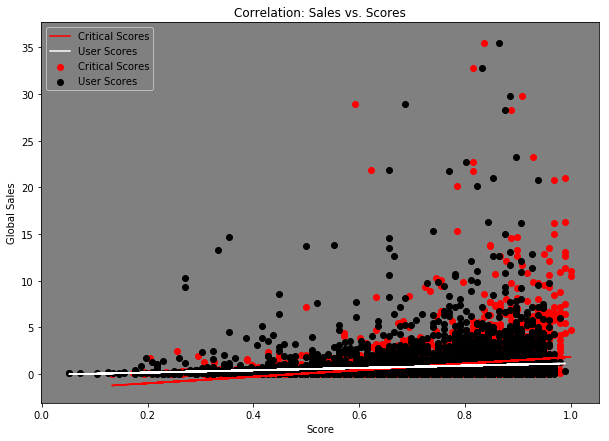

In [8]:
# create an empty plot
fig, ax = pp.subplots()

# simple linear regression with predictor critic-score, response sales
fit_c = np.polyfit(cdf['Critic_Score'], cdf['Global_Sales'], deg = 1)

# simple linear regression with predictor user score, response sales
fit_u = np.polyfit(cdf['User_Score'], cdf['Global_Sales'], deg = 1)

# form model equations from the regression, then label and plot them
ax.plot(cdf['Critic_Score'], 
        fit_c[0] * cdf['Critic_Score'] + fit_c[1], 
        color = 'red', 
        label = 'Critical Scores') 

# the above is for critic scores, and below, for user scores
ax.plot(cdf['User_Score'], 
        fit_u[0] * cdf['User_Score'] + fit_u[1], 
        color = 'white', 
        label = 'User Scores')

# plot and label the data for critic and user scores, and sales
ax.scatter(x = cdf['Critic_Score'], 
           y = cdf['Global_Sales'], 
           color = 'red', 
           label = 'Critical Scores')

# for user scores 
ax.scatter(x = cdf['User_Score'], 
           y = cdf['Global_Sales'], 
           color = 'black', 
           label = 'User Scores')

# provide axis labels, a legend, and a title
ax.set(xlabel = 'Score', ylabel = 'Global Sales', title = 'Correlation: Sales vs. Scores')
ax.legend()

##### A brief summary:
Stuff.

## Step 4: Analysis, Hypothesis Testing, & Machine Learning

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html 

http://scikit-learn.org/stable/modules/sgd.html 




In [ ]:
incorporate those above links into the writeup too

In [ ]:
model1 = smf.ols(formula='S2BQ3B ~ C(FAMHIST)', data=sub3).fit()
print(model1.summary())

use the smf stuff to redo the linear regressions above, but also try new models with more than one feature
do the summary to find model statistics

compare them, we will formally do this later step remember we took out outlier

##### Explanations & Interpretations:

## Step 5: Insights & Investigative Flaws

*Well.*